In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/telco_train.csv")
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')

In [3]:
df = df.drop(['Churn Category','Churn Reason','Churn','City','Country','Customer ID','Customer Status','Lat Long', 'Latitude', 'Longitude','Population','Quarter','State','Zip Code'],axis=1)

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

Internet Type     886
Offer            2324
dtype: int64

In [5]:
df.fillna("None", inplace=True)


In [6]:
X = df.drop(['Churn Score'],axis=1)

In [7]:
y = df['Churn Score']

In [8]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Contract', 'Gender', 'Internet Type', 'Offer', 'Payment Method']

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # for scikit-learn < 1.2
encoded_data = encoder.fit_transform(X[categorical_cols])

In [10]:
encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=X.index)

X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

regressors = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor(max_iter=500)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in regressors.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))  # manual RMSE
        r2 = r2_score(y_test, preds)
        print(f"{name} — RMSE: {rmse:.2f}, R²: {r2:.2f}")
    except Exception as e:
        print(f"{name} failed: {e}")


LinearRegression — RMSE: 17.78, R²: 0.31
DecisionTree — RMSE: 24.14, R²: -0.26
RandomForest — RMSE: 17.33, R²: 0.35
GradientBoosting — RMSE: 17.49, R²: 0.34
XGBoost — RMSE: 19.18, R²: 0.20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1905
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 45
[LightGBM] [Info] Start training from score 58.248817
LightGBM — RMSE: 17.71, R²: 0.32
SVR — RMSE: 21.45, R²: 0.00
KNN — RMSE: 22.63, R²: -0.11
MLP — RMSE: 20.03, R²: 0.13


In [12]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,           # reduce depth to avoid memorization
    min_samples_leaf=10,   # each leaf must have at least 10 samples
    random_state=42
)


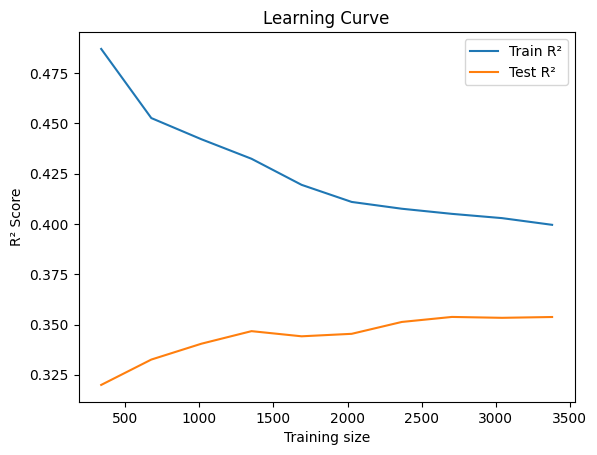

In [13]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train R²')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test R²')
plt.xlabel("Training size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [14]:
import pickle

# Train your model
model.fit(X, y)

# Save model
with open("churn_score.pkl", "wb") as f:
    pickle.dump(model, f)
with open("churn_score_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
with open("churn_score_categorical_columns.pkl", "wb") as f:
    pickle.dump(categorical_cols, f)
